In [1]:
# !pip install beautifulsoup4

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = 'https://www.worldometers.info/coronavirus/'

# Create object page
page = requests.get(url)

In [4]:
page

<Response [200]>

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple
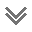

In [5]:
page.text

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"
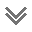

In [6]:
soup = BeautifulSoup(page.text, 'lxml')
soup

In [7]:
# Obtain information from tag <table>
table1 = soup.find('table', id='main_table_countries_today')
table1

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [8]:
# Obtain every title of columns with tag <th>
headers = []
for i in table1.find_all('th'):
    title = i.text
    headers.append(title)

In [9]:
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [10]:
headers[13]

'Tests/\n1M pop\n'

In [11]:
headers[13] = 'Tests per 1M Pop'

In [12]:
headers

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests per 1M Pop',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [13]:
# Create a dataframe
mydata = pd.DataFrame(columns = headers)

In [14]:
table1.find_all('tr')[1:]

[<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>North America</nobr>
 </td>
 <td>108,440,327</td>
 <td>+34,095</td>
 <td>1,497,901</td>
 <td>+134</td>
 <td>101,532,381</td>
 <td>+30,941</td>
 <td>5,410,045</td>
 <td>9,639</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="North America" style="display:none;">North America</td>
 <td>
 </td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>
 <td>165,149,445</td>
 <td>+190,177</td>
 <td>1,443,918</td>
 <td>+129</td>
 <td>158,683,077</td>
 <td>+119,888</td>
 <td>5,022,450</td>
 <td>11,331</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="Asia" style="display:none;">Asia</td>
 <td>
 </td>
 <td></td>
 <td></td>
 <td></t

In [15]:
table1.find_all('tr')[100]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">92</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/honduras/">Honduras</a></td>
<td style="font-weight: bold; text-align:right">432,139</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">10,919 </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">132,498</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">288,722</td>
<td style="font-weight: bold; text-align:right">105</td>
<td style="font-weight: bold; text-align:right">42,257</td>
<td style="font-weight: bold; text-align:right">1,068</td>
<td style="font-weight: bold; text-align:right">1,420,311</td>
<td style="font-weight: bold; text-align:right">138,887</td>
<td style="font-weight: bold;

In [16]:
# Create a for loop to fill mydata
for j in table1.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(mydata)
    mydata.loc[length] = row

In [17]:
mydata

#       Country,Other   TotalCases  NewCases TotalDeaths NewDeaths  \
0       \nNorth America\n  108,440,327   +34,095   1,497,901      +134   
1                \nAsia\n  165,149,445  +190,177   1,443,918      +129   
2       \nSouth America\n   61,351,734    +5,733   1,311,539        +2   
3              \nEurope\n  211,700,816   +24,037   1,866,739       +99   
4             \nOceania\n   10,778,991   +59,676      15,452      +124   
..  ..                ...          ...       ...         ...       ...   
241                Total:  211,700,816   +24,037   1,866,739       +99   
242                Total:   10,778,991   +59,676      15,452      +124   
243                Total:   12,477,996               256,609             
244                Total:          721                    15             
245                Total:  569,900,030  +313,718   6,392,173      +488   

    TotalRecovered NewRecovered ActiveCases Serious,Critical  ... TotalTests  \
0      101,532,381      +30,941   5,410,045            9,639  ...              
1      158,683,077     +119,888   5,022,450           11,331  ...              
2       58,330,927      +17,564   1,709,268           10,452  ...              
3      200,629,775     +130,206   9,204,302            7,712  ...              
4       10,231,907      +11,774     531,632              201  ...              
..             ...          ...         ...              ...  ...        ...   
241    200,629,775     +130,206   9,204,302            7,712  ...              
242     10,231,907      +11,774     531,632              201  ...              
243     11,645,499                  575,888              999  ...              
244            706                        0                0  ...              
245    541,054,272     +310,373  22,453,585           40,334  ...              

    Tests per 1M Pop Population          Continent 1 Caseevery X ppl  \
0                                    North America                \n   
1                                             Asia                \n   
2                                    South America                \n   
3                                           Europe                \n   
4                                Australia/Oceania                \n   
..               ...        ...                ...               ...   
241                                         Europe                     
242                              Australia/Oceania                     
243                                         Africa                     
244                                                                    
245                                            All                \n   

    1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop New Deaths/1M pop  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             
..                 ...               ...              ...               ...   
241                                                                           
242                                                                           
243                                                                           
244                                                                           
245                                                                           

    Active Cases/1M pop  
0                        
1                        
2                        
3                        
4                        
..                  ...  
241                      
242                      
243                      
244                      
245                      

[246 rows x 22 columns]

In [18]:
# Drop and clearing unnecessary rows
mydata.drop(mydata.index[0:7], inplace=True)
mydata.drop(mydata.index[222:229], inplace=True)
mydata.reset_index(inplace=True, drop=True)
# Drop “#” column
mydata.drop('#', inplace=True, axis=1)

In [19]:
mydata

Country,Other   TotalCases  NewCases TotalDeaths NewDeaths TotalRecovered  \
0           World  569,900,030  +313,718   6,392,173      +488    541,054,272   
1             USA   91,529,862            1,049,683                86,861,939   
2           India   43,803,619              525,825                43,132,140   
3          Brazil   33,398,040              675,929                31,738,181   
4          France   33,168,499              150,979                30,799,534   
..            ...          ...       ...         ...       ...            ...   
227        Total:  211,700,816   +24,037   1,866,739       +99    200,629,775   
228        Total:   10,778,991   +59,676      15,452      +124     10,231,907   
229        Total:   12,477,996               256,609               11,645,499   
230        Total:          721                    15                      706   
231        Total:  569,900,030  +313,718   6,392,173      +488    541,054,272   

    NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  ...  \
0       +310,373  22,453,585           40,334           73,113  ...   
1                  3,618,240            4,322                   ...   
2                    145,654              698           31,117  ...   
3                    983,930            8,318          154,875  ...   
4                  2,217,986              869          505,860  ...   
..           ...         ...              ...              ...  ...   
227     +130,206   9,204,302            7,712                   ...   
228      +11,774     531,632              201                   ...   
229                  575,888              999                   ...   
230                        0                0                   ...   
231     +310,373  22,453,585           40,334         73,112.9  ...   

        TotalTests Tests per 1M Pop      Population          Continent  \
0                                                                  All   
1    1,061,231,231                                       North America   
2      870,653,486          618,486  1,407,717,693                Asia   
3       63,776,166          295,745    215,645,555       South America   
4      271,490,188        4,140,560     65,568,473              Europe   
..             ...              ...             ...                ...   
227                                                             Europe   
228                                                  Australia/Oceania   
229                                                             Africa   
230                                                                      
231                                                                All   

    1 Caseevery X ppl 1 Deathevery X ppl 1 Testevery X ppl New Cases/1M pop  \
0                  \n                                                         
1                                                                             
2                  32              2,677                 2                    
3                   6                319                 3                    
4                   2                434                 0                    
..                ...                ...               ...              ...   
227                                                                           
228                                                                           
229                                                                           
230                                                                           
231                \n                                                         

    New Deaths/1M pop Active Cases/1M pop  
0                                          
1                                          
2                                     103  
3                                   4,563  
4                                  33,827  
..                ...                 ...  
227                             